In [313]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt

In [341]:
def in_range(point, n):
    if 0 <= point[0] < n and 0 <= point[1] < n:
        return True
    else:
        return False

def point_energy(n,r, point, matrix, energy_layout):
    x, y = point
    current_element = matrix[y][x]
    energy = 0
    i = 0
    
    for add_y in range(0, 2*r + 1):
        for add_x in range(0, 2*r + 1):
            neighbor_x, neighbor_y = x + add_x - r, y + add_y - r

            if in_range((neighbor_x,neighbor_y), n):
                
                neighbor_element = matrix[neighbor_y][neighbor_x]
                energy_contribution = energy_layout[add_y][add_x]
                
                if current_element == neighbor_element:
                    energy_contribution *= 1
                else:
                    energy_contribution *= -1
                
                energy += energy_contribution
    
    return energy


In [347]:
def full_energy(n,r,matrix, energy_layout, exponential = False):
    energy = 0
    for y in range(n):
        for x in range(n):
            if exponential:
                to_add = point_energy(n,r,(x,y), matrix, energy_layout)
                if to_add < 0:
                    energy -= to_add**2
                else:
                    energy += to_add**2
            else:
                energy += point_energy(n,r,(x, y), matrix, energy_layout)
    return energy

In [316]:
def swapped_points(n, matrix):
    p1 = (random.randrange(n), random.randrange(n))
    p2 = p1
    while matrix[p1[1]][p1[0]] == matrix[p2[1]][p2[0]]:
        p1 = (random.randrange(n), random.randrange(n))
    return p1, p2

def swap_point(p1,p2, matrix):
    x1, y1 = p1
    x2, y2 = p2
    matrix[y1][x1], matrix[y2][x2] = matrix[y2][x2], matrix[y1][x1]
    return matrix

In [317]:
def first_matrix(n, percent):
    return [[random.random() > percent for _ in range(n)] for _ in range(n)]

In [343]:
def binary_image(n, percent_black, energy_layout,iterations = 70000,temperature=lambda x: x*0.9999, exp = False):
    if len(energy_layout) == 5:
        r = 2
    else:
        r = 1
    matrix = first_matrix(n, percent_black)
    current_energy = full_energy(n,r,matrix, energy_layout, exp)
    p = 1
    for i in range(iterations):
        p = temperature(p)
        p1, p2 = swapped_points(n,matrix)
        matrix = swap_point(p1,p2, matrix)
        new_energy = full_energy(n,r,matrix, energy_layout, exp)
        if new_energy < current_energy or random.random() <  p:
            current_energy = new_energy
        else:
            matrix = swap_point(p1,p2, matrix)
    return matrix, current_energy

In [319]:
def visualize_img(matrix_1, n):
    m = [matrix_1[x][y] for y in range(n) for x in range(n)]
    img = np.array(m).reshape(n,n)
    plt.imshow(img, cmap=plt.cm.gray)


In [320]:
m1 = [[1,0,1],[0,0,0],[1,0,1]]
m2 = [[1,1,1,1,1], [1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,1,1,1,1]]
m3 = [[-1,-1,-1],[1,0,1], [-1,-1,-1]]
m4 = [[0,1,0],[1,0,1],[0,1,0]]
m5 = [[1,0,0,0,0], [0,1,0,0,0],[0,0,0,0,0],[0,0,0,1,0],[0,0,0,0,1]]

### Sasiedztwo: m1
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma

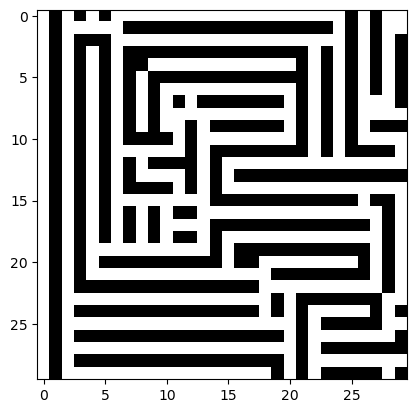

In [321]:
results, e1 = binary_image(30, 0.5,energy_layout=m1)
visualize_img(results, 30)

### Sasiedztwo: m1
### Funckja tempeartury: x*0.9
### Fukcja energii: suma

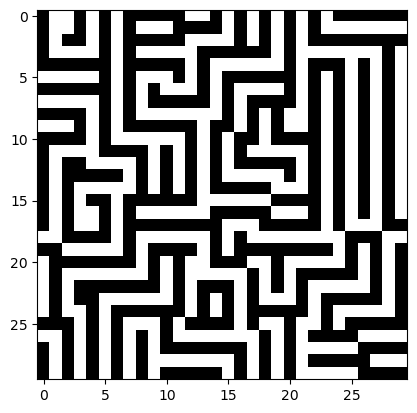

In [322]:
results, e2 = binary_image(30, 0.5,energy_layout=m1, temperature=lambda x: x*0.9)
visualize_img(results, 30)

### Sasiedztwo: m1
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma do kwadratu

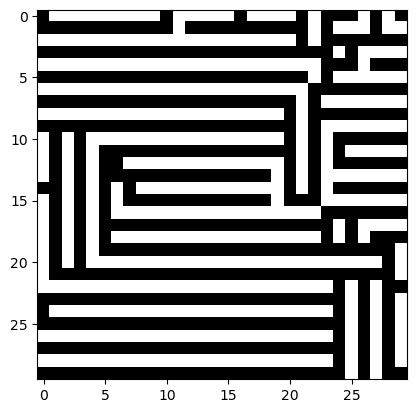

In [348]:
results, e3 = binary_image(30, 0.5,energy_layout=m1, temperature=lambda x: x*0.9999, exp=True)
visualize_img(results, 30)

In [349]:
dataset1 = pd.DataFrame()
dataset1["m1"] = e3

In [323]:
dataset = pd.DataFrame()
dataset["m1"] = [e1, e2]

### Sasiedztwo: m2
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma

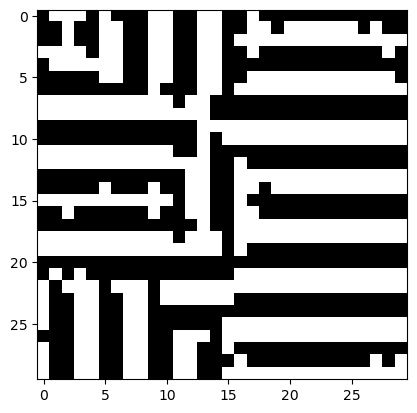

In [324]:
results, e1 = binary_image(30, 0.5,energy_layout=m2)
visualize_img(results, 30)

### Sasiedztwo: m2
### Funckja tempeartury: x*0.9
### Fukcja energii: suma

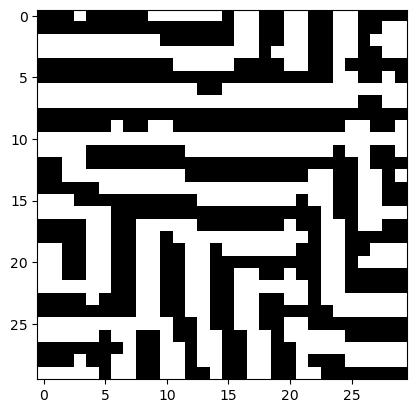

In [325]:
results, e2 = binary_image(30, 0.5,energy_layout=m2, temperature=lambda x: x*0.9)
visualize_img(results, 30)

### Sasiedztwo: m2
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma dop kwadratu

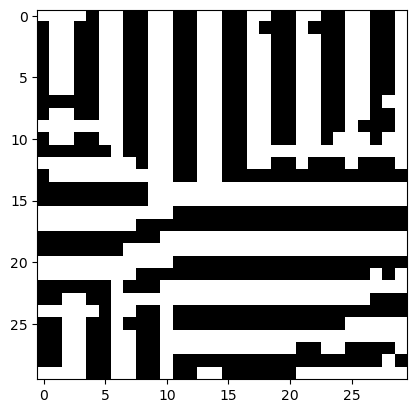

In [350]:
results, e3 = binary_image(30, 0.5,energy_layout=m2, exp=True)
visualize_img(results, 30)
dataset1["m2"] = e3

In [326]:
dataset["m2"] = [e1, e2]

### Sasiedztwo: m3
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma

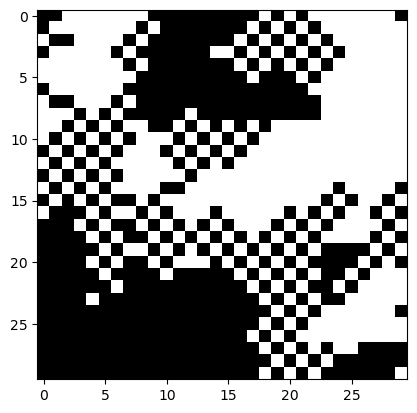

In [327]:
results, e1 = binary_image(30, 0.5,energy_layout=m3)
visualize_img(results, 30)

### Sasiedztwo: m3
### Funckja tempeartury: x*0.9
### Fukcja energii: suma

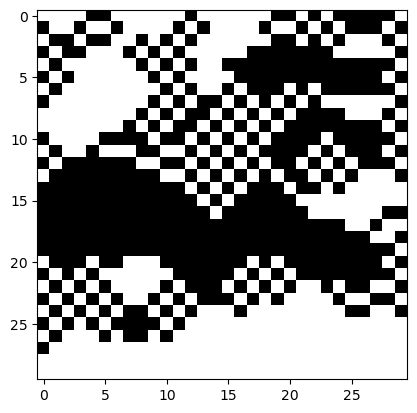

In [328]:
results, e2 = binary_image(30, 0.5,energy_layout=m3, temperature=lambda x: x*0.9)
visualize_img(results, 30)

### Sasiedztwo: m3
### Funckja tempeartury: x*0.9999
### Fukcja energii:  do kwadratu

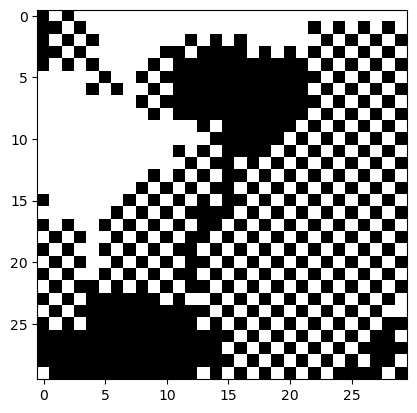

In [351]:
results, e3 = binary_image(30, 0.5,energy_layout=m3, exp = True)
visualize_img(results, 30)
dataset1["m3"] = e3

In [329]:
dataset["m3"] = [e1, e2]

### Sasiedztwo: m4
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma

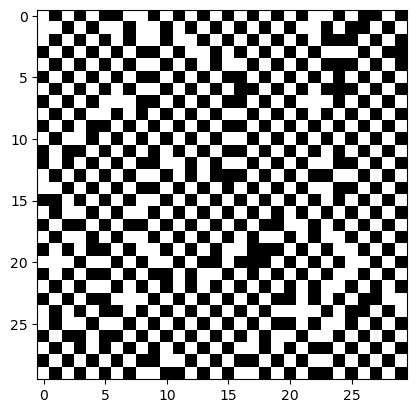

In [330]:
results, e1 = binary_image(30, 0.5,energy_layout=m4)
visualize_img(results, 30)

### Sasiedztwo: m4
### Funckja tempeartury: x*0.9
### Fukcja energii: suma

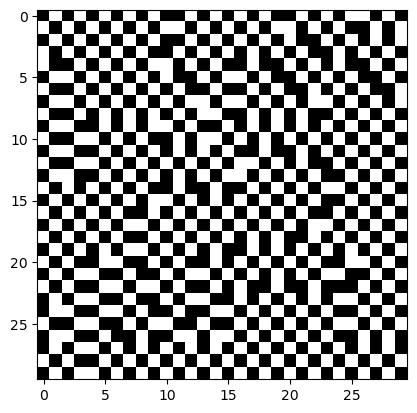

In [331]:
results, e2 = binary_image(30, 0.5,energy_layout=m4, temperature=lambda x: x*0.9)
visualize_img(results, 30)

### Sasiedztwo: m4
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma do kwadratu

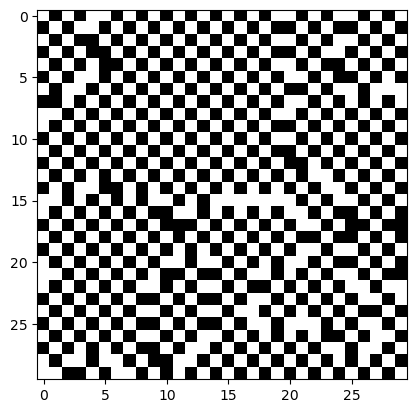

In [352]:
results, e3 = binary_image(30, 0.5,energy_layout=m4)
visualize_img(results, 30)
dataset1["m3"] = e3

In [332]:
dataset["m4"] = [e1, e2]

### Sasiedztwo: m5
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma

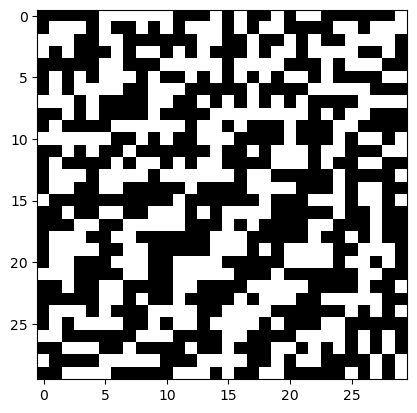

In [333]:
results, e1 = binary_image(30, 0.5,energy_layout=m5)
visualize_img(results, 30)

### Sasiedztwo: m5
### Funckja tempeartury: x*0.9
### Fukcja energii: suma

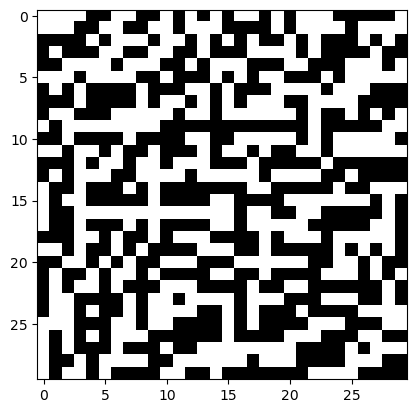

In [334]:
results, e2 = binary_image(30, 0.5,energy_layout=m5, temperature=lambda x: x*0.9)
visualize_img(results, 30)

### Sasiedztwo: m5
### Funckja tempeartury: x*0.9999
### Fukcja energii: suma do kwadartu

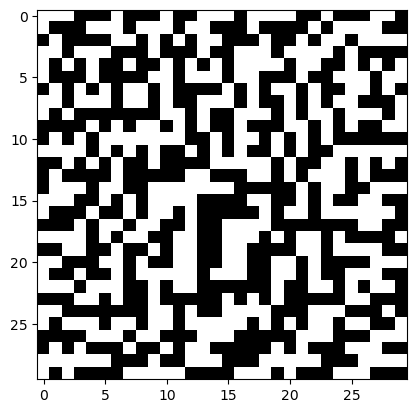

In [353]:
results, e3 = binary_image(30, 0.5,energy_layout=m5)
visualize_img(results, 30)
dataset1["m5"] = e3

In [335]:
dataset["m5"] = [e1, e2]

#### **FUNCKJA ENERGI - SUMA ENERGI Z PUNKTOW**

In [340]:
dataset.index=["temp = x*0,9999", "temp = x*0,9"]
dataset

,m1,m2,m3,m4,m5
"temp = x*0,9999",-2688,-5376,-2624,-2596,-1378
"temp = x*0,9",-2348,-4884,-2488,-2584,-1218


# **WNIOSKI**

### **Generowanie stanów sąsiednich:**
Stany sąsiednie są generowane przez wybieranie losowo dwóch kratek o dwóch róznych kolorach (czarnym i białym). W przypadku zwiększenia wielkości obrazka mozna byłoby wybierac więcej punktów.




### **RÓZNICE ZE WZGLEDU NA**

#### Rodzaj sąsiedztwa:

Pomimo tej samej ilosci iteracji, funckcjii temperatury i ilości czarnmych punktów, inne funkcje sąsiedztwa generują zupełnie inne obrazy. Testy odbyły się na sąsiedztwach:\
m1 - kratki, stykajace sie rogami i majace ten sam kolor odpychaja się \
m2 - kratka odpycha kratki tego samego koloru znajdujące się w odstepie jednej kratki\
m3 - kratka odpycha kratki tego samego koloru z swojej lewej i prawej strony oraz odpycha kratki innego koloru stykajace się z nią od góry i z dołu (równie te stykające się rogami)\
m4 - kratka odpycha kratki tego samego koloru stykajace się z nia całą krawedzią\
m5 - kratka odpycha kratki tego samego koloru stykajace się z nią lewym górnym rogiem i prawym dolnym oraz kratki oddalone o jedna kratke które stykaja sie z kratka odpychana\

Sasiedztwo m1 próbuje tworzyć jak najdłuzsze proste linie jednego koloru, o szerokości jednej kratki.\
Sąsiedztwo m2 próbuje tworzyć jak najdłuzsze proste linie jednego koloru, o szerokości dwóch kratek\
Sasiedztwo m3 tworzy pewego rodzaju gradienty, na obszarze tego obrazka mamy plamy jednego koloru ktore stopniowo(przez szachownice) przechodzą w plamy drugiego koloru\
Sasiedztwo m4 próbuje utworzyc jak najidealniejszą kratke \
Sasiedztwo m6 próbuje utworzyć coś w rodzaju pepitki? \


#### Szybkosci spadku temperatury:

Symulacje z wolniejszym spadkiem temperatury uzyskały mniejszą energie (mozemy to zaobserować w tabeli powzyej tekstu). Sa one bardziej idealne i lepeij obrazuja pozadane efekty

#### Rodzaje funckji energi

1. Funkcja z sumy
2. Funkcja wykładnicza (suma do kwadratu z kazdego punktu z zachowaniem znaku!)

Lepsze efekty wizualne dały nam obrazki stworzone funkcja 2. Stało sie tak zapewne przez wykładniczy przyrost energii.
